In [ ]:

#TODO: fix value thing on df
#TODO: move to code 
#TODO: try fashion 
#TODO: nothing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mnist.loader import MNIST
import seaborn as sns
from sklearn.decomposition import PCA

# Dimension reduction and clustering libraries
import umap``
import hdbscan
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.datasets import fetch_openml

In [2]:
# mndata = MNIST('../../fashion-mnist/data/fashion')
# train, train_labels = mndata.load_training()
# test, test_labels = mndata.load_testing()
# data = np.array(np.vstack([train, test]), dtype=np.float64) / 255.0
# target = np.hstack([train_labels, test_labels])
# classes = [
#     'T-shirt/top',
#     'Trouser',
#     'Pullover',
#     'Dress',
#     'Coat',
#     'Sandal',
#     'Shirt',
#     'Sneaker',
#     'Bag',
#     'Ankle boot']
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(int)
data = mnist.data

/Users/andrew/mambaforge/envs/clustering/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
mnist_pca =  PCA()
mnist_pca.fit(data)

Text(0.5, 0, 'Number of principal components')

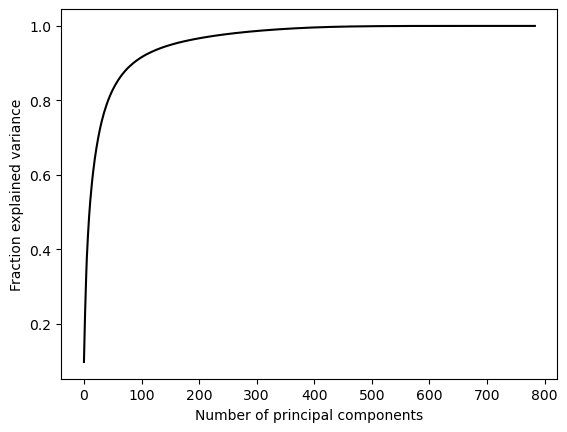

In [14]:
fig,ax = plt.subplots(1,1)
ax.plot(np.cumsum(mnist_pca.explained_variance_ratio_),color='k')
ax.set_ylabel('Fraction explained variance')
ax.set_xlabel('Number of principal components')

In [24]:
lowd_mnist = PCA(n_components=50).fit_transform(data)
pca_labels = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=500).fit_predict(lowd_mnist)

In [60]:
pca_clustered = (pca_labels >= 0)
print(f'Proportion of data points assigned to a cluster after PCA: {pca_clustered.sum()/len(lowd_mnist)}')

Proportion of data points assigned to a cluster after PCA: 0.18637142857142858


In [36]:
pca_labeled_examples = []
for pred_label in np.unique(pca_labels[pca_labels >=0]):
    indices = (pca_labels == pred_label)
    pca_labeled_examples.append(data.values[indices])

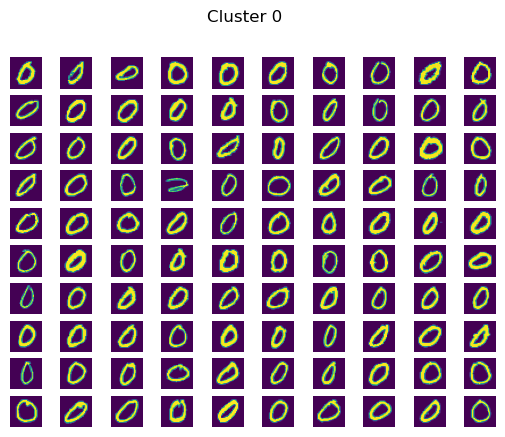

In [52]:
lab=0
fig, axs = plt.subplots(10,10)
fig.suptitle(f'Cluster {lab} (PCA)')
for ax, idx in zip(axs.flatten(),np.random.choice(len(pca_labeled_examples[lab]), 100)):
    ax.imshow(pca_labeled_examples[lab][idx].reshape(28,28))
    ax.axis('off')

In [49]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(data)

/Users/andrew/mambaforge/envs/clustering/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


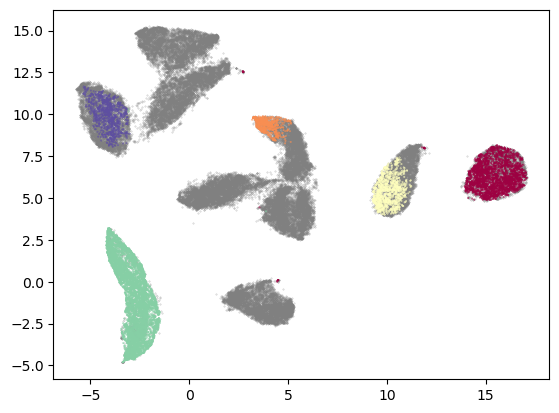

In [51]:
clustered = (pca_labels >= 0)
plt.scatter(standard_embedding[~pca_clustered, 0],
            standard_embedding[~pca_clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(standard_embedding[pca_clustered, 0],
            standard_embedding[pca_clustered, 1],
            c=pca_labels[pca_clustered],
            s=0.1,
            cmap='Spectral')

In [53]:
umap_embedding = umap.UMAP(n_neighbors=30, min_dist=0.1).fit_transform(data)

In [54]:
umap_labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(umap_embedding)

In [59]:
umap_clustered = (umap_labels >= 0)
print(f'Proportion of data points assigned to a cluster after UMAP: {umap_clustered.sum()/len(lowd_mnist)}')

Proportion of data points assigned to a cluster after UMAP: 0.9920571428571429


In [61]:
umap_labeled_examples = []
for pred_label in np.unique(umap_labels[umap_labels >=0]):
    indices = (umap_labels == pred_label)
    umap_labeled_examples.append(data.values[indices])

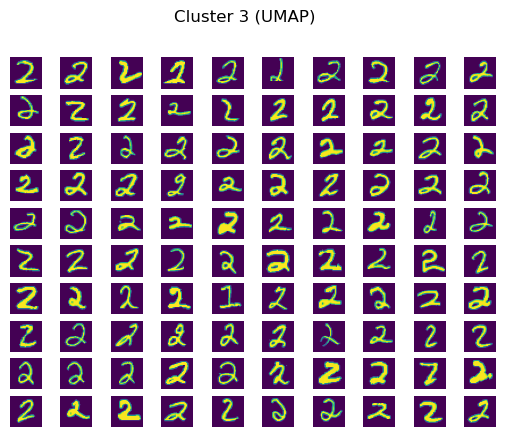

In [67]:
lab=3
fig, axs = plt.subplots(10,10)
fig.suptitle(f'Cluster {lab} (UMAP)')
for ax, idx in zip(axs.flatten(),np.random.choice(len(umap_labeled_examples[lab]), 100)):
    ax.imshow(umap_labeled_examples[lab][idx].reshape(28,28))
    ax.axis('off')

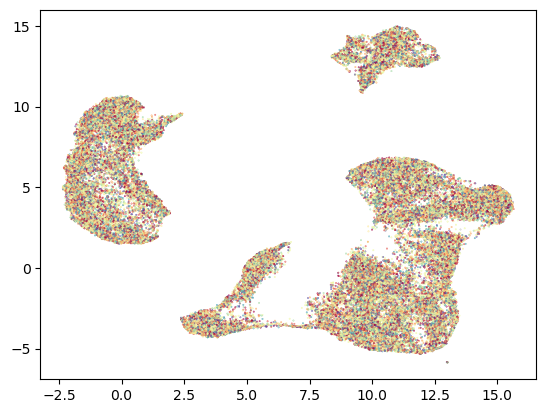

In [159]:
clustered = (labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral')

In [8]:
np.sum(clustered) / data.shape[0]

0.2384